In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [56]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [57]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900
3,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000
4,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000


In [58]:
housing.dtypes

GrLivArea          int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
MSZoning          object
Street            object
Alley             object
LotShape          object


In [60]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)

In [ ]:
# feature engineering

# how to approach this - 
# do I want to make some variables binary?
# do I wnat to combine measurements (sqft)?

In [48]:
features['YearBuilt'].describe() # 1872-2010
features['YearRemodAdd'].describe()

count    2580.000000
mean     1983.751938
std        20.490242
min      1950.000000
25%      1965.000000
50%      1992.000000
75%      2003.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [49]:
(features['YearRemodAdd'] - features['YearBuilt']).describe()

count    2580.000000
mean       13.437984
std        24.619501
min        -1.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       127.000000
dtype: float64

In [67]:
sf

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
170,2377,50,60.000000,10410,4,5,1915,1950,0.0,0.0,0.0,1313.0,1313.0,1313,0,1064,0.0,0.0,2,0,3,1,8,1,1954.0,2.0,528.0,0,0,432,0,0,0,0,6,2009,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
181,935,40,50.000000,9100,5,6,1930,1960,0.0,0.0,0.0,742.0,742.0,779,0,156,0.0,0.0,1,0,2,1,4,0,1988.0,1.0,308.0,0,0,0,0,0,0,600,8,2008,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,None,Detchd,Unf,TA,TA,P,None,None,Shed,WD,Normal
205,1484,50,60.000000,10320,4,1,1910,1950,0.0,0.0,0.0,771.0,771.0,866,504,114,0.0,0.0,2,0,3,1,6,0,1910.0,1.0,264.0,14,211,0,0,84,0,0,9,2007,RM,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,Fa,Fa,CBlock,TA,Fa,No,Unf,Unf,GasA,Fa,Y,SBrkr,TA,Sal,None,Detchd,Unf,TA,Fa,N,None,None,None,COD,Abnorml
211,1200,160,30.000000,3180,7,5,2005,2005,0.0,0.0,0.0,600.0,600.0,520,600,80,0.0,0.0,2,1,2,1,4,0,2005.0,2.0,480.0,0,166,0,0,0,0,0,6,2006,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,RFn,TA,TA,Y,None,None,None,WD,Normal
219,1522,50,60.000000,6000,5,5,1926,1950,0.0,0.0,0.0,1008.0,1008.0,1008,0,514,0.0,0.0,2,0,4,1,7,0,1926.0,0.0,0.0,0,0,138,0,0,0,0,6,2006,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Fa,BrkTil,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,None,None,None,None,P,None,None,None,WD,Normal
339,1382,50,92.098571,12358,5,6,1941,1950,0.0,360.0,0.0,360.0,720.0,854,0,528,0.0,0.0,1,1,2,1,7,0,1991.0,2.0,660.0,237,0,0,0,0,0,0,5,2007,RM,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal
469,2358,70,50.000000,5250,8,5,1872,1987,0.0,259.0,0.0,425.0,684.0,938,1215,205,0.0,0.0,2,0,4,1,8,0,1872.0,0.0,0.0,0,54,20,0,0,0,0,12,2008,RM,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,BrkTil,TA,Fa,No,LwQ,Unf,OthW,Fa,N,SBrkr,TA,Typ,None,None,None,None,None,Y,None,None,None,WD,Normal
474,1656,50,60.000000,10410,5,7,1916,1987,0.0,0.0,0.0,660.0,660.0,808,704,144,0.0,0.0,2,1,3,1,8,0,1916.0,1.0,180.0,0,0,0,140,0,0,0,8,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Min2,None,Detchd,Unf,Fa,Fa,N,None,MnPrv,None,WD,Normal
675,1531,50,50.000000,9350,4,6,1947,1979,0.0,192.0,0.0,564.0,756.0,1169,0,362,0.0,0.0,1,0,3,1,8,1,1947.0,1.0,209.0,0,0,0,0,0,0,0,6,2010,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Wd Shng,None,TA,TA,CBlock,TA,Fa,No,LwQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,TA,Y,None,MnPrv,None,WD,Normal
766,1480,50,60.000000,5400,6,6,1920,1950,0.0,0.0,0.0,97

In [82]:
# for most homes, total ground living area is sum of 1st + 2nd floor
features[['1stFlrSF', '2ndFlrSF', 'GrLivArea']]

sf = features[features['GrLivArea'] != (features['1stFlrSF'] + features['2ndFlrSF'])]
sf[['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']]

sf['TotalSF'] = sf['1stFlrSF'] + sf['2ndFlrSF'] + sf['LowQualFinSF']
sf[['GrLivArea', 'TotalSF']]

features[features['LowQualFinSF'] != 0].shape
sf.shape

# if home has low quality finished sq ft, this is included in living area

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_19702/3989866467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['TotalSF'] = sf['1stFlrSF'] + sf['2ndFlrSF'] + sf['LowQualFinSF']


(33, 80)

In [39]:
features['WoodDeckSF'].describe()
features['OpenPorchSF'].describe()
features['EnclosedPorch'].describe()
features['3SsnPorch'].describe()
features['ScreenPorch'].describe()

count    2580.000000
mean       16.200388
std        56.824783
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

In [46]:
features['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [40]:
features['PoolArea'].describe()

count    2580.000000
mean        1.662016
std        30.339396
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

In [42]:
features['PoolQC'].value_counts()

None    2571
TA         3
Ex         2
Gd         2
Fa         2
Name: PoolQC, dtype: int64

In [43]:
features['MiscFeature'].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

In [44]:
features['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [45]:
features['SaleCondition'].value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

<Axes: >

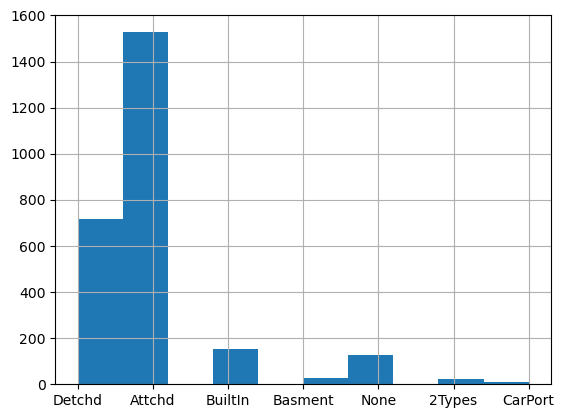

In [29]:
features['GarageType'].hist()

<Axes: >

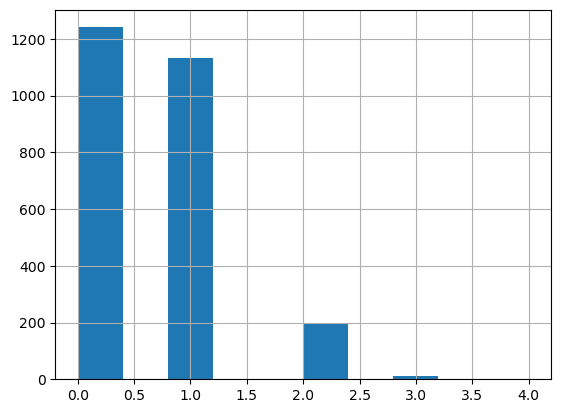

In [26]:
features['Fireplaces'].hist()

In [28]:
features['Fireplace_bool'] = if(housing['Fireplace'] == 0)

SyntaxError: invalid syntax (3149206144.py, line 1)

In [ ]:
features.drop(['Fireplaces'])

In [6]:
housing.filter(regex='Garage')

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
GrLivArea,,,,,,,
856,1939.0,2.0,399.0,Detchd,Unf,TA,TA
1049,1984.0,1.0,266.0,Attchd,Fin,TA,TA
1001,1930.0,1.0,216.0,Detchd,Unf,TA,Po
1039,1940.0,1.0,281.0,Detchd,Unf,TA,TA
1665,2001.0,2.0,528.0,Attchd,Fin,TA,TA
...,...,...,...,...,...,...,...
952,1916.0,1.0,192.0,Detchd,Unf,Fa,Po
1733,1955.0,2.0,452.0,Attchd,Unf,TA,TA
2002,1949.0,3.0,871.0,2Types,Unf,TA,TA


In [8]:
housing['GarageCars'].describe()

count    2580.000000
mean        1.747577
std         0.738535
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [13]:
housing[housing['GarageType'] == 'None'].shape

(127, 79)

<Axes: >

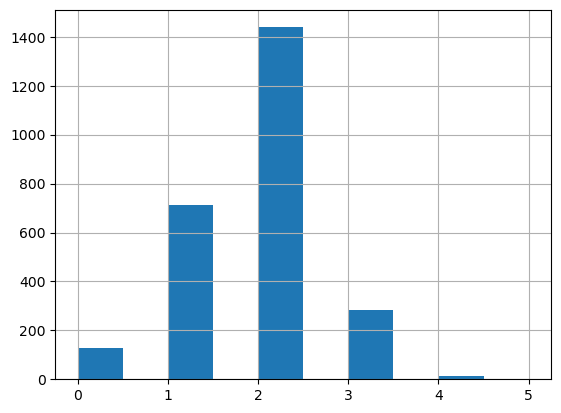

In [10]:
housing['GarageCars'].hist()

<Axes: >

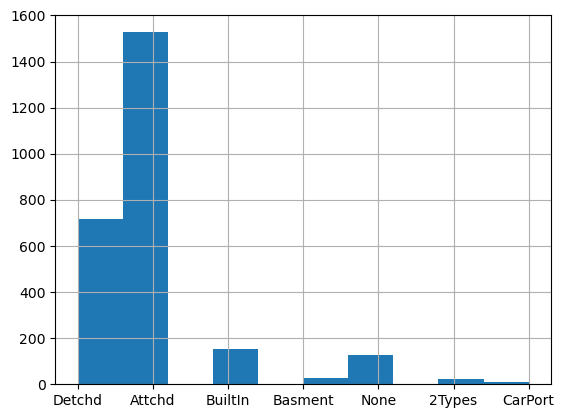

In [9]:
housing['GarageType'].hist()

In [ ]:
housing.filter(regex='Bsmt')

<Axes: >

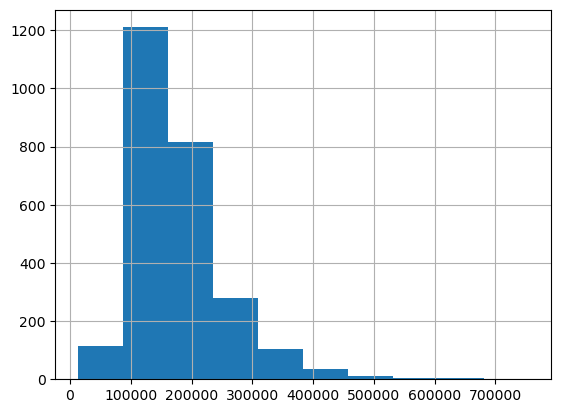

In [4]:
# sale price is skewed left
housing.SalePrice.hist()

<Axes: >

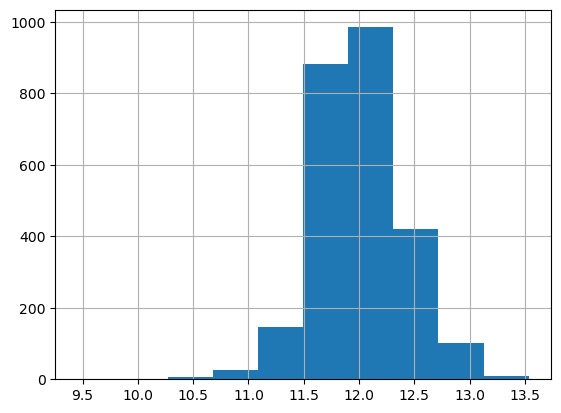

In [5]:
# log transformation might be more useful
np.log(housing.SalePrice).hist()